In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt 

import folium
from folium import plugins
from folium.plugins import HeatMap
import seaborn as sns

# Reading Files

In [ ]:
httplinks = '/content/gdrive/My Drive/Colab Notebooks/dict/httplinks2.npy'
httplinks_np = np.load(httplinks)
display(httplinks_np.shape)
httplinks_np[:5]

(8538,)

array(['https://maps.googleapis.com/maps/api/distancematrix/json?units=metric&mode=walking&origins=42.23233466666667,-71.12974273109015&destinations=42.2558083,-71.1228839|42.23576736450195,-71.139892578125|42.274532,-71.171713&key=',
       'https://maps.googleapis.com/maps/api/distancematrix/json?units=metric&mode=walking&origins=42.232159,-71.12882909999998&destinations=42.2558083,-71.1228839|42.23576736450195,-71.139892578125|42.274532,-71.171713&key=',
       'https://maps.googleapis.com/maps/api/distancematrix/json?units=metric&mode=walking&origins=42.23263326428572,-71.13062761719596&destinations=42.2558083,-71.1228839|42.23576736450195,-71.139892578125|42.274532,-71.171713&key=',
       'https://maps.googleapis.com/maps/api/distancematrix/json?units=metric&mode=walking&origins=42.23284216428572,-71.12951666706404&destinations=42.2558083,-71.1228839|42.23576736450195,-71.139892578125|42.274532,-71.171713&key=',
       'https://maps.googleapis.com/maps/api/distancematrix/json?uni

In [ ]:
httplinks_ls = list(httplinks_np)
print(len(httplinks_ls))
httplinks_ls[:5]

8538


['https://maps.googleapis.com/maps/api/distancematrix/json?units=metric&mode=walking&origins=42.23233466666667,-71.12974273109015&destinations=42.2558083,-71.1228839|42.23576736450195,-71.139892578125|42.274532,-71.171713&key=',
 'https://maps.googleapis.com/maps/api/distancematrix/json?units=metric&mode=walking&origins=42.232159,-71.12882909999998&destinations=42.2558083,-71.1228839|42.23576736450195,-71.139892578125|42.274532,-71.171713&key=',
 'https://maps.googleapis.com/maps/api/distancematrix/json?units=metric&mode=walking&origins=42.23263326428572,-71.13062761719596&destinations=42.2558083,-71.1228839|42.23576736450195,-71.139892578125|42.274532,-71.171713&key=',
 'https://maps.googleapis.com/maps/api/distancematrix/json?units=metric&mode=walking&origins=42.23284216428572,-71.12951666706404&destinations=42.2558083,-71.1228839|42.23576736450195,-71.139892578125|42.274532,-71.171713&key=',
 'https://maps.googleapis.com/maps/api/distancematrix/json?units=metric&mode=walking&origins

In [ ]:
httplinks = [x +'KEYYYY' for x in httplinks_ls]
httplinks[:5]

['https://maps.googleapis.com/maps/api/distancematrix/json?units=metric&mode=walking&origins=42.23233466666667,-71.12974273109015&destinations=42.2558083,-71.1228839|42.23576736450195,-71.139892578125|42.274532,-71.171713&key=KEYYYY',
 'https://maps.googleapis.com/maps/api/distancematrix/json?units=metric&mode=walking&origins=42.232159,-71.12882909999998&destinations=42.2558083,-71.1228839|42.23576736450195,-71.139892578125|42.274532,-71.171713&key=KEYYYY',
 'https://maps.googleapis.com/maps/api/distancematrix/json?units=metric&mode=walking&origins=42.23263326428572,-71.13062761719596&destinations=42.2558083,-71.1228839|42.23576736450195,-71.139892578125|42.274532,-71.171713&key=KEYYYY',
 'https://maps.googleapis.com/maps/api/distancematrix/json?units=metric&mode=walking&origins=42.23284216428572,-71.12951666706404&destinations=42.2558083,-71.1228839|42.23576736450195,-71.139892578125|42.274532,-71.171713&key=KEYYYY',
 'https://maps.googleapis.com/maps/api/distancematrix/json?units=met

# Distance Matrix Request

In [ ]:
import requests

In [ ]:
def http_to_dic(httplinks):
  """
  input: 
    Distance Matrix API style http links
  
  output:
    dictionary
  """
  i=0
  dictionary = {}
  for link in httplinks:
    r = requests.get(url = link)
    data = r.json()
    dictionary[i] = data
    i+=1
  return dictionary


In [ ]:
DMA_dict = http_to_dic(httplinks)

In [ ]:
DMA_dict[9]

{'destination_addresses': ['1232 River St, Hyde Park, MA 02136, USA',
  '65 Sprague St, Boston, MA 02136, USA',
  '1400 VFW Pkwy, West Roxbury, MA 02132, USA'],
 'origin_addresses': ['26 Meadowview Rd, Hyde Park, MA 02136, USA'],
 'rows': [{'elements': [{'distance': {'text': '3.0 km', 'value': 3008},
     'duration': {'text': '37 mins', 'value': 2249},
     'status': 'OK'},
    {'distance': {'text': '1.7 km', 'value': 1749},
     'duration': {'text': '23 mins', 'value': 1374},
     'status': 'OK'},
    {'distance': {'text': '7.0 km', 'value': 6970},
     'duration': {'text': '1 hour 29 mins', 'value': 5317},
     'status': 'OK'}]}],
 'status': 'OK'}

# dictionary write as json

In [ ]:
import json

json = json.dumps(DMA_dict)
f = open("DMA_dict_closest2.json","w")
f.write(json)
f.close()

!cp DMA_dict_closest2.json "/content/gdrive/My Drive/Colab Notebooks/dict/"

# Analysis

In [ ]:
import json
DMA2_path =  "/content/gdrive/My Drive/Colab Notebooks/dict/DMA_dict_closest2.json"
with open(DMA2_path) as json_file:
    DMA2_dict = json.load(json_file)

In [ ]:
DMA2_dict['0']

{'destination_addresses': ['1232 River St, Hyde Park, MA 02136, USA',
  '65 Sprague St, Boston, MA 02136, USA',
  '1400 VFW Pkwy, West Roxbury, MA 02132, USA'],
 'origin_addresses': ['53 Meadowview Rd, Hyde Park, MA 02136, USA'],
 'rows': [{'elements': [{'distance': {'text': '3.1 km', 'value': 3135},
     'duration': {'text': '39 mins', 'value': 2344},
     'status': 'OK'},
    {'distance': {'text': '1.9 km', 'value': 1876},
     'duration': {'text': '24 mins', 'value': 1469},
     'status': 'OK'},
    {'distance': {'text': '7.1 km', 'value': 7097},
     'duration': {'text': '1 hour 30 mins', 'value': 5412},
     'status': 'OK'}]}],
 'status': 'OK'}

In [ ]:
DMA2_dict['0']['rows'][0]['elements'][0]

{'distance': {'text': '3.1 km', 'value': 3135},
 'duration': {'text': '39 mins', 'value': 2344},
 'status': 'OK'}

In [ ]:
DMA_list = []
for i in range(len(DMA2_dict)):
  if i not in [5884,5893,6086,6185,7557]:
    temp_list = []
    temp_DMA = DMA2_dict[str(i)]['rows'][0]['elements']
    for j in range(len(temp_DMA)):
      temp_list.append([    temp_DMA[j]['distance']['value'],temp_DMA[j]['duration']['value']           ])
    DMA_list.append(temp_list)

In [ ]:
DMA_list[51][0]

[2715, 2024]

<font color=crimson> Generate replacement for DMA cloest 1 and find index. </font>

In [ ]:
idx_15 = []
DMA_replace = []
for i in range(len(DMA_list)):
  temp_list = DMA_list[i]
  for j in range(len(temp_list)):
    if temp_list[j][1] <= 900:
      idx_15.append([i,j])
      DMA_replace.append(DMA_list[i][j])

display(len(idx_15))
display(len(DMA_replace))

744

744

In [ ]:
import copy
idx_15_padded = copy.deepcopy(idx_15)
for pair in idx_15_padded:
  if pair[0] > 5884 and pair[0] < 5893:
    pair[0]+=1
  elif pair[0] > 5893 and pair[0] < 6086:
    pair[0]+=2
  elif pair[0] > 6086 and pair[0] < 6185:
    pair[0]+=3
  elif pair[0] > 6185 and pair[0] < 7557:
    pair[0]+=4
  elif pair[0] > 7557:
    pair[0]+=5
len(idx_15_padded)

744

# Incoporate

In [ ]:
bit_path = "/content/gdrive/My Drive/Colab Notebooks/Final_DMA/visual_bit_df.csv"
bit_df = pd.read_csv(bit_path)
DMA1_path = "/content/gdrive/My Drive/Colab Notebooks/Final_DMA/DMA_refine.csv"
DMA1_df = pd.read_csv(DMA1_path)
display(bit_df.head())
display(DMA1_df.head())

,Parcel lat,Parcel lon,zip,supermarket,grocery,healthcares,hospitals,openspaces
0,42.232335,-71.129743,2136,0,1,0,0,1
1,42.232159,-71.128829,2136,0,1,0,0,1
2,42.232633,-71.130628,2136,0,1,0,0,1
3,42.232842,-71.129517,2136,0,1,0,0,1
4,42.232839,-71.132042,2136,0,1,0,0,1


,Parcel lat,Parcel lon,zipcode,supermarket dist,supermarket walking time,grocery dist,grocery walking time,healthcares dist,healthcares walking time,hospitals dist,hospitals walking time,openspaces dist,openspaces walking time
0,42.232335,-71.129743,2136,2993.0,2221.0,860.0,643.0,1718.0,1351.0,3003.0,2268.0,443.0,337.0
1,42.232159,-71.128829,2136,3131.0,2318.0,999.0,740.0,1857.0,1448.0,3141.0,2365.0,1080.0,794.0
2,42.232633,-71.130628,2136,2892.0,2146.0,759.0,568.0,1617.0,1276.0,2902.0,2193.0,352.0,265.0
3,42.232842,-71.129517,2136,2934.0,2175.0,801.0,597.0,1659.0,1305.0,2944.0,2222.0,407.0,307.0
4,42.232839,-71.132042,2136,2802.0,2075.0,669.0,497.0,1527.0,1204.0,2812.0,2121.0,282.0,211.0


In [ ]:
bit_np = bit_df.iloc[:,3:].to_numpy()
i_filter = list(np.sum(bit_np,axis=1))
idx15_to_DMA= []
for i in range(len(i_filter)):
  if i_filter[i] < 5:
    idx15_to_DMA.append(i)
    
display(len(idx15_to_DMA))
display(max(idx15_to_DMA))

8538

13120

In [ ]:
[idx15_to_DMA[x] for x in [5884,5893,6086,6185,7557]]

[8145, 8163, 8562, 8785, 11625]

<font color=crimson> This matches with the wrong parcel in DMA closest 1, only having one more. </font>

In [ ]:
bit_np = bit_df.iloc[:,3:].to_numpy()
DMA1_np = DMA1_df.iloc[:,3:].to_numpy()
DMA2_np = copy.deepcopy(DMA1_np)
print(bit_np.shape,DMA1_np.shape,DMA2_np.shape)

(13121, 5) (13121, 10) (13121, 10)


In [ ]:
ii_list = []
for i in range(len(idx_15)):
  temp_idx = idx_15_padded[i]
  ii = idx15_to_DMA[temp_idx[0]]
  
  temp_bit = find_idx(bit_np[ii])
  jj = temp_bit[temp_idx[1]]
  ii_list.append([ii,jj])
len(ii_list)

744

In [ ]:
for i in range(len(ii_list)):
  idx = ii_list[i]
  replace = DMA_replace[i]

  DMA2_np[idx[0],[2*idx[1]]] = replace[0]
  DMA2_np[idx[0],[2*idx[1]+1]] = replace[1]

In [ ]:
DMA2_df = pd.DataFrame(DMA2_np,columns=DMA1_df.columns[3:])
DMA2_df = pd.concat((DMA1_df.iloc[:,:3],DMA2_df),axis=1)
DMA2_df.head()

,Parcel lat,Parcel lon,zipcode,supermarket dist,supermarket walking time,grocery dist,grocery walking time,healthcares dist,healthcares walking time,hospitals dist,hospitals walking time,openspaces dist,openspaces walking time
0,42.232335,-71.129743,2136,2993.0,2221.0,860.0,643.0,1718.0,1351.0,3003.0,2268.0,443.0,337.0
1,42.232159,-71.128829,2136,3131.0,2318.0,999.0,740.0,1857.0,1448.0,3141.0,2365.0,1080.0,794.0
2,42.232633,-71.130628,2136,2892.0,2146.0,759.0,568.0,1617.0,1276.0,2902.0,2193.0,352.0,265.0
3,42.232842,-71.129517,2136,2934.0,2175.0,801.0,597.0,1659.0,1305.0,2944.0,2222.0,407.0,307.0
4,42.232839,-71.132042,2136,2802.0,2075.0,669.0,497.0,1527.0,1204.0,2812.0,2121.0,282.0,211.0


In [ ]:
DMA2_df.to_csv('DMA2_refine.csv',index=False)
!cp DMA2_refine.csv "/content/gdrive/My Drive/Colab Notebooks/Final_DMA/"

# <font color=darkgreen> Stats </font>

In [ ]:
bit2_df = DMA2_df.iloc[:,[0,1,2,4,6,8,10,12]].copy(deep=True)

MAX_SEC = 15*60
bit2_np = bit2_df.to_numpy()
f = lambda x : 1 if x <= MAX_SEC else 0
for i in range(len(bit2_np[:,3:])):
  for j in range(len(bit2_np[:,3:][0])):
    if float(bit2_np[:,3:][i][j]) < MAX_SEC:
      bit2_np[:,3:][i][j] = 1
    else:
      bit2_np[:,3:][i][j] = 0

bit2_df= pd.DataFrame(bit2_np,columns=['Parcel lat','Parcel lon','zip','supermarket','grocery','healthcares','hospitals','openspaces'])
bit2_df.head()

,Parcel lat,Parcel lon,zip,supermarket,grocery,healthcares,hospitals,openspaces
0,42.232335,-71.129743,2136.0,0.0,1.0,0.0,0.0,1.0
1,42.232159,-71.128829,2136.0,0.0,1.0,0.0,0.0,1.0
2,42.232633,-71.130628,2136.0,0.0,1.0,0.0,0.0,1.0
3,42.232842,-71.129517,2136.0,0.0,1.0,0.0,0.0,1.0
4,42.232839,-71.132042,2136.0,0.0,1.0,0.0,0.0,1.0


In [ ]:
bit2_df.to_csv('bit2_df.csv',index=False)
!cp bit2_df.csv "/content/gdrive/My Drive/Colab Notebooks/Final_DMA/"

In [ ]:
refine_path = "/content/gdrive/My Drive/Colab Notebooks/Final_DMA/DMA2_refine.csv"
bit_path = "/content/gdrive/My Drive/Colab Notebooks/Final_DMA/bit2_df.csv"
refine_csv = pd.read_csv(refine_path)
bit_csv = pd.read_csv(bit_path)

display(refine_csv.head())
display(bit_csv.head())

,Parcel lat,Parcel lon,zipcode,supermarket dist,supermarket walking time,grocery dist,grocery walking time,healthcares dist,healthcares walking time,hospitals dist,hospitals walking time,openspaces dist,openspaces walking time
0,42.232335,-71.129743,2136,2993.0,2221.0,860.0,643.0,1718.0,1351.0,3003.0,2268.0,443.0,337.0
1,42.232159,-71.128829,2136,3131.0,2318.0,999.0,740.0,1857.0,1448.0,3141.0,2365.0,1080.0,794.0
2,42.232633,-71.130628,2136,2892.0,2146.0,759.0,568.0,1617.0,1276.0,2902.0,2193.0,352.0,265.0
3,42.232842,-71.129517,2136,2934.0,2175.0,801.0,597.0,1659.0,1305.0,2944.0,2222.0,407.0,307.0
4,42.232839,-71.132042,2136,2802.0,2075.0,669.0,497.0,1527.0,1204.0,2812.0,2121.0,282.0,211.0


,Parcel lat,Parcel lon,zip,supermarket,grocery,healthcares,hospitals,openspaces
0,42.232335,-71.129743,2136.0,0.0,1.0,0.0,0.0,1.0
1,42.232159,-71.128829,2136.0,0.0,1.0,0.0,0.0,1.0
2,42.232633,-71.130628,2136.0,0.0,1.0,0.0,0.0,1.0
3,42.232842,-71.129517,2136.0,0.0,1.0,0.0,0.0,1.0
4,42.232839,-71.132042,2136.0,0.0,1.0,0.0,0.0,1.0


In [ ]:
zipcodes = refine_csv['zipcode'].unique()
zipcodes

array([2136, 2111, 2131, 2116, 2129, 2132, 2127, 2126, 2122, 2113, 2215,
       2118, 2124, 2125, 2114, 2119, 2121, 2130, 2110, 2128, 2199, 2115,
       2120, 2134, 2135, 2210, 2109, 2108, 2133])

In [ ]:
zip_analysis = np.zeros((zipcodes.shape[0],5))
servs = bit_csv.columns[3:]
for i in range(len(zipcodes)):
  zip = zipcodes[i]
  temp_df = bit_csv[bit_csv['zip']==zip]
  for j in range(5):
    serv = servs[j]
    ratio = temp_df[[serv]].sum()/temp_df[[serv]].shape[0]

    zip_analysis[i][j] = ratio

In [ ]:
zip_num_parcel = np.zeros((zipcodes.shape[0],1))
for i in range(len(zipcodes)):
  zip = zipcodes[i]
  zip_num_parcel[i] = bit_csv[bit_csv['zip']==zip].shape[0]
zip_num_parcel = [int(x) for x in zip_num_parcel]
zip_num_parcel[:10]

[1327, 77, 978, 271, 276, 1399, 570, 636, 538, 55]

In [ ]:
zip_df_2=pd.DataFrame(zip_analysis,columns=bit_csv.columns[3:])
zip_df_1 = pd.DataFrame(zipcodes,columns = ['zipcode'])
zip_df_3 = pd.DataFrame(zip_num_parcel,columns = ['number_of_parcels'])

zip_df = pd.concat([zip_df_1,zip_df_3,zip_df_2],axis=1)
zip_df.sort_values(by=['number_of_parcels'],inplace=True,ascending=False,ignore_index=True)

zip_df.head()

,zipcode,number_of_parcels,supermarket,grocery,healthcares,hospitals,openspaces
0,2132,1399,0.190851,0.937098,0.964260,0.312366,0.942816
1,2136,1327,0.434062,0.908063,0.893745,0.136398,0.972871
2,2124,1215,0.430453,0.996708,0.997531,0.892181,0.994239
3,2130,995,0.745729,0.952764,0.983920,0.705528,0.988945
4,2131,978,0.641104,0.967280,0.967280,0.510225,0.983640


In [ ]:
zip_df[zip_df['zipcode']==2133].index.values
zip_df.drop(zip_df[zip_df['zipcode']==2133].index.values,inplace=True)

(28, 7)

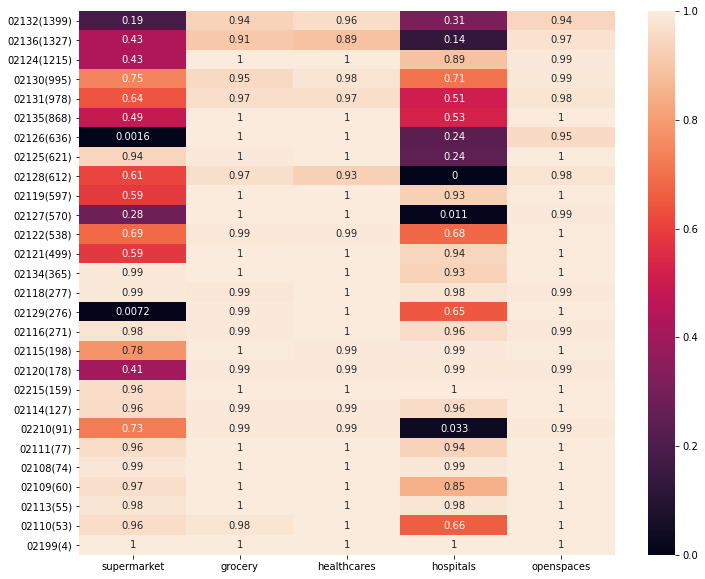

In [ ]:
zipcodes_num_parcel = ['0'+str(zip_df['zipcode'].iloc[i])+'('+str(zip_df['number_of_parcels'].iloc[i])+')' for i in range(zip_df.shape[0])]
plt.subplots(figsize=(12,10))
ax = sns.heatmap(zip_df.iloc[:,2:],annot=True,yticklabels=zipcodes_num_parcel)

Map

In [ ]:
temp = bit2_df.iloc[:,3:].sum(axis=1)
temp

0        2.0
1        2.0
2        2.0
3        2.0
4        2.0
        ... 
13116    2.0
13117    2.0
13118    2.0
13119    3.0
13120    3.0
Length: 13121, dtype: float64

In [ ]:
merged_count = pd.concat([bit2_df.iloc[:,:3],temp],axis=1)
display(merged_count.head())
merged_count.columns

,Parcel lat,Parcel lon,zip,0
0,42.232335,-71.129743,2136.0,2.0
1,42.232159,-71.128829,2136.0,2.0
2,42.232633,-71.130628,2136.0,2.0
3,42.232842,-71.129517,2136.0,2.0
4,42.232839,-71.132042,2136.0,2.0


Index(['Parcel lat', 'Parcel lon', 'zip', 0], dtype='object')

In [ ]:
lacking_np = merged_count.iloc[:,[0,1,3]].to_numpy()

In [ ]:
import folium
color_list = ['#800000', '#DC143C', '#FF8C00','#FFD700','#9ACD32','#00FFFF']


mapit = folium.Map( location=[42.3069291 , -71.10383542], tiles="Stamen Terrain",zoom_start=10 )
for coord in lacking_np:
    folium.CircleMarker( location=[ coord[0], coord[1] ], radius=2, color=color_list[int(coord[2])],).add_to( mapit )

from folium.plugins import FloatImage
image_file = ('https://drive.google.com/file/d/1IS3TOYFNfuXtVngKZyBvh5K1M631Gp52/view?usp=sharing')

FloatImage(image_file, bottom=70, left=86).add_to(mapit)


mapit.save( 'num_service_map.html')

In [ ]:
!cp num_service_map.html "/content/gdrive/My Drive/Colab Notebooks/visual"

# <font color=darkgreen> Conclusion </font>

<font color=crimson> This closest 2 analysis generate 744 new pairs. </font>